In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

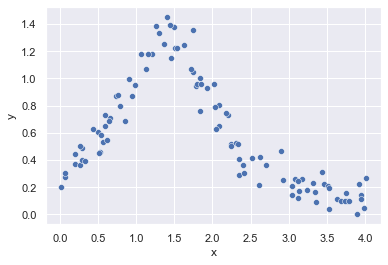

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [2]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [3]:
d = df[(df.x >= 0) & (df.x <= 1.5)]
d
Xa= d['x'].values.reshape(-1,1)
Yb= d['y'].values.reshape(-1,1)
modelo.fit(Xa, Yb)
print("inter. eje y:", modelo.intercept_)
print("pendiente:", modelo.coef_)
print("r^2:", modelo.score(Xa,Yb))

NameError: name 'modelo' is not defined

## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

In [4]:
def L(x,a,k):
    m,n = a.shape
    X = np.matrix(x).T
    DeltaB=(a*X - k) # b gorro - b
    return (DeltaB.T*DeltaB)[0,0]/m #matriz 1x1

In [5]:
y = df.loc[:, ['y']]
x = df.loc[:, ['x']].rename(columns={'x': 'x1'})

x.insert(0, 'x0', 1)
x['x2'] = x['x1']*x['x1']
x['x3'] = x['x2']*x['x1']
x['x4'] = x['x3']*x['x1']
x['x5'] = x['x4']*x['x1']

xn = x.to_numpy()
yn = y.to_numpy()

In [6]:

rpta = sp.optimize.minimize(fun=L,x0=np.zeros(xn.shape[1]), args = (xn,yn), tol=1e-10)
print("Valor de los coeficientes:",rpta['x'])
print("Valor de f(0):",rpta['x'][0])


Valor de los coeficientes: [ 0.35735891 -0.84260978  3.78479736 -3.00339341  0.85844634 -0.08305832]
Valor de f(0): 0.35735890677951315


In [7]:
Y2 = df["y"]
b = np.linspace(0,4,100)
def fb(a,b,c,d,e,f,x):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
prediccion = fb(rpta['x'][5],rpta['x'][4],rpta['x'][3],rpta['x'][2],rpta['x'][1],rpta['x'][0],b)
r_2 = 1-np.sum((prediccion-Y2)**2)/np.sum((Y2-Y2.mean())**2)
r_2

0.9111078606491493

In [8]:
print("Se puede decir que se obtiene un resultado similar a la polinomial exacta")

Se puede decir que se obtiene un resultado similar a la polinomial exacta


## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [9]:
Y = df.loc[:, ['y']]

Y

,y
0,0.277413
1,0.202239
2,0.307369
3,0.367530
4,0.491144
...,...
95,0.225565
96,0.000000
97,0.141005
98,0.115500


In [10]:
x = df.loc[:, ['x']].rename(columns={'x': 'x1'})
x.insert(0, 'x0', 1)
x['x2'] = X['x1']*X['x1']
x['x3'] = X['x2']*X['x1']
x['x4'] = X['x3']*X['x1']
x['x5'] = X['x4']*X['x1']
xn = x.to_numpy()
yn = y.to_numpy()
rta= np.linalg.inv(xn.T @ xn) @ Xn.T @ yn
b_0, b_1, b_2, b_3, b_4, b_5 = rta
coef = str(b_0) +','+ str(b_1) + ',' + str(b_2) + ',' + str(b_3) + ',' + str(b_4) + ',' + str(b_5)
print(f"los coeficientes  son = {coef}")
print(f"El valor de f(0) es :", rta[0])

NameError: name 'X' is not defined

In [11]:
print("Se puede decir que el valor es muy parecido con el valor obtenido en la regresión polinomica")

Se puede decir que el valor es muy parecido con el valor obtenido en la regresión polinomica


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

In [12]:
def f(pIn,x):
    return (pIn[0])/((x-pIn[1])**2 + pIn[2])**pIn[3]
def Lfit(parametros,x,y): # funcion de costo MSE (No es la mejor!)
    # L = promedio sobre todos los puntos (f(a,b,c;x)-y)^2
    # parametros np.array([a,b,c])
    deltaY=f(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)


In [13]:
x2 = df["x"]
rta2 = sp.optimize.minimize(fun=Lfit, x0=np.array([0,0,1,0]), args = (xb,yb), method='L-BFGS-B', tol=1e-8)
print("Los valores de a,b,c y omega son :",rta2['x'])
print("El valor de f(0) es:", f(rpta.x,0))

NameError: name 'xb' is not defined

In [14]:
print("Se puede observar que este metodo no funciona muy bien, ya que hay una diferencia notable con el valor de f(0)")

Se puede observar que este metodo no funciona muy bien, ya que hay una diferencia notable con el valor de f(0)


## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$
* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$
* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.